# Questão 3

## Packages

In [8]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

## Functions

In [ ]:
def create_sqlite_connection(database):
    """
    Connect to the database (creates a new database if it doesn't exist)
    ---
    database - database name
    """
    # creates connection
    conn = sqlite3.connect(database)
    # sets cursor
    c = conn.cursor()
    return conn, c

def histogram(variable, title, xlabel):
    """
    plot histogram 
    ---
    variable - value to be plotted
    title - plot title
    xlabel - x axis label
    """
    # Configurações do seaborn para melhor visualização
    sns.set(style="whitegrid")
    # Montar o histograma usando seaborn
    sns.histplot(variable, kde=False, color='skyblue')
    # Configurações do gráfico
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequência')
    # Exibir o gráfico
    plt.show()

## Parameters

In [ ]:
database = 'test_analytics_engineer.db'
prefix_path = "Data/"

player_att_select = "SELECT * FROM Player_Attributes_Modified"
team_att_select = "SELECT * FROM Team_Attributes_Modified"

## Execution

In [3]:
conn, c = create_sqlite_connection(database)

In [4]:
df_country = pd.read_csv(prefix_path+"Country.csv")
df_league = pd.read_csv(prefix_path+"League.csv")
df_match = pd.read_csv(prefix_path+"Match.csv")
df_player = pd.read_csv(prefix_path+"Player.csv")
df_team = pd.read_csv(prefix_path+"Team.csv")

df_player_att = pd.read_sql(player_att_select, con=conn)
df_team_att = pd.read_sql(team_att_select, con=conn)

### Player

In [7]:
df_player.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


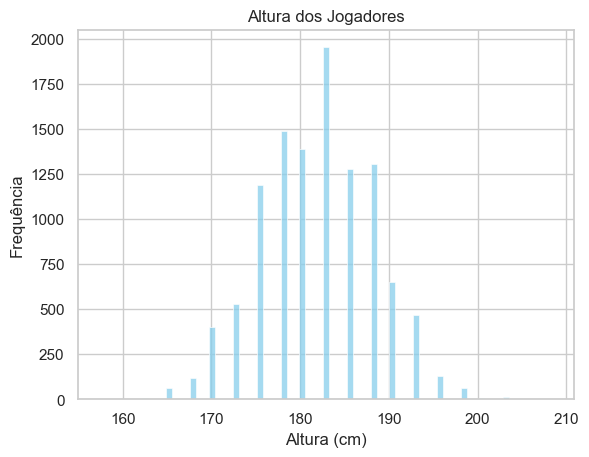

In [15]:
histogram(df_player['height'], 'Altura dos Jogadores', 'Altura (cm)')

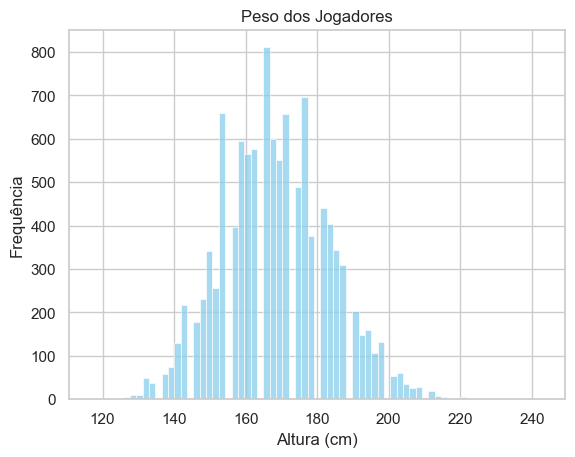

In [16]:
histogram(df_player['weight'], 'Peso dos Jogadores', 'Altura (cm)')

### Match

In [19]:
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [37]:
df_match.describe(datetime_is_numeric=True)

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


### Team_Attributes

In [23]:
df_team_att.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [ ]:
df_team_att.info()

In [42]:
print(df_team_att.date.min())
print(df_team_att.date.max())

2014-09-19 00:00:00
2015-09-10 00:00:00


In [32]:
df_team_att.groupby("team_api_id").mean().sort_values("buildUpPlayDribbling", ascending=False)

,buildUpPlayDribbling
team_api_id,
9875,72.0
8564,70.0
8592,69.5
9804,69.0
8245,69.0
...,...
8549,30.0
9880,30.0
10219,30.0


### Player_Attributes

In [38]:
df_player_att.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [ ]:
df_player_att.info()

In [43]:
print(df_player_att.date.min())
print(df_player_att.date.max())

2007-02-22 00:00:00
2016-07-07 00:00:00


In [40]:
df_player_att[['preferred_foot','player_api_id']].groupby("preferred_foot").count()

,player_api_id
preferred_foot,
left,44107
right,136247


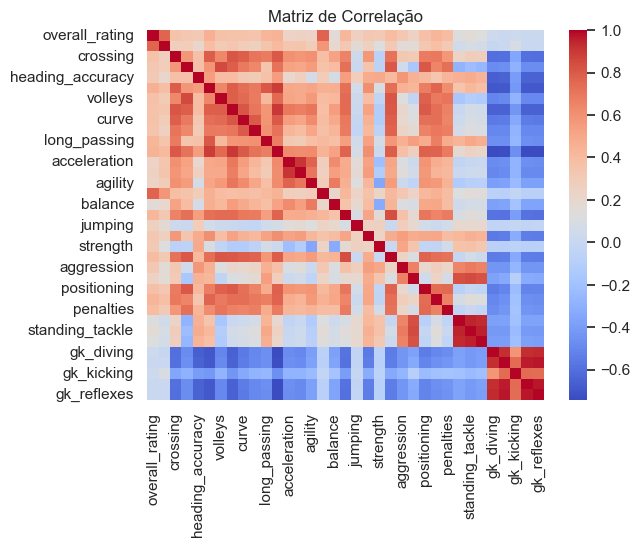

In [29]:
correlation_matrix = df_player_att.corr()

# Plotar o gráfico de matriz de correlação usando seaborn
sns.heatmap(correlation_matrix, cmap='coolwarm')

# Configurações do gráfico
plt.title('Matriz de Correlação')

# Exibir o gráfico
plt.show()